In [17]:
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy.sparse import csc_array
import scipy.sparse.linalg as spla

import matplotlib.pyplot as plt
import matplotlib as mpl

# default parameters of the plot layout
plt.rcParams["text.usetex"] = False  # use latex
plt.rcParams["font.size"] = 13
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.constrained_layout.use"] = True

from qs_mps.applications.Z2.exact_hamiltonian import *
from qs_mps.sparse_hamiltonians_and_operators import *
from qs_mps.mps_class import MPS
from qs_mps.utils import anim, get_cx, get_cy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
L = 6
model = "Ising"
chi = 8
couplings = np.arange(0,0.4,step=1e-2)
eps = 0
J = 1

In [29]:
ising_chain = MPS(L=L, d=2, model=model,chi=chi, J=J, h=couplings[0], eps=eps)
state = 1/np.sqrt(2**L) * np.array([[[1],[1]]])
mag_x_tot = []
mag_z_tot = []
fidelity = []
for i, h in enumerate(couplings):
    print(f"coupling: {h:.4f}")
  
    if i >= 1:
        mps_param_h_prev = ising_chain.sites.copy()

    ising_chain._random_state(seed=3, chi=chi)
    ising_chain.canonical_form()
    ising_chain.h = h
    energies, entropy, schmidt_vals, t_dmrg = ising_chain.DMRG(trunc_chi=True, trunc_tol=False, conv_tol=1e-15, n_sweeps=4, where=L//2, DMRG2=True)
    # ising_chain.order_param_Ising(op="X")
    # mag_x_tot.append(ising_chain.mpo_first_moment().real/L)
    ising_chain.single_operator_Ising(site=L//2)
    mag_x_tot.append(ising_chain.mpo_first_moment().real)
    # ising_chain.order_param_Ising(op="Z")
    # mag_z_tot.append(ising_chain.mpo_first_moment().real/L)
    ising_chain.single_operator_Ising(site=L//2, op="Z")
    mag_z_tot.append(ising_chain.mpo_first_moment().real)
    if i >= 1:
        ising_chain.ancilla_sites = mps_param_h_prev.copy()
        fidelity.append(ising_chain._compute_norm(site=1, ancilla=True).copy())

coupling: 0.0000
Sweep n: 0

Site: 1

Site: 2

Site: 3

Site: 4

Site: 5

Sweep n: 1

Site: 6

(1, 3, 1)
(2, 3, 2)
(4, 3, 4)
(8, 3, 8)
(4, 3, 4)
(2, 3, 2)


IndexError: list index out of range

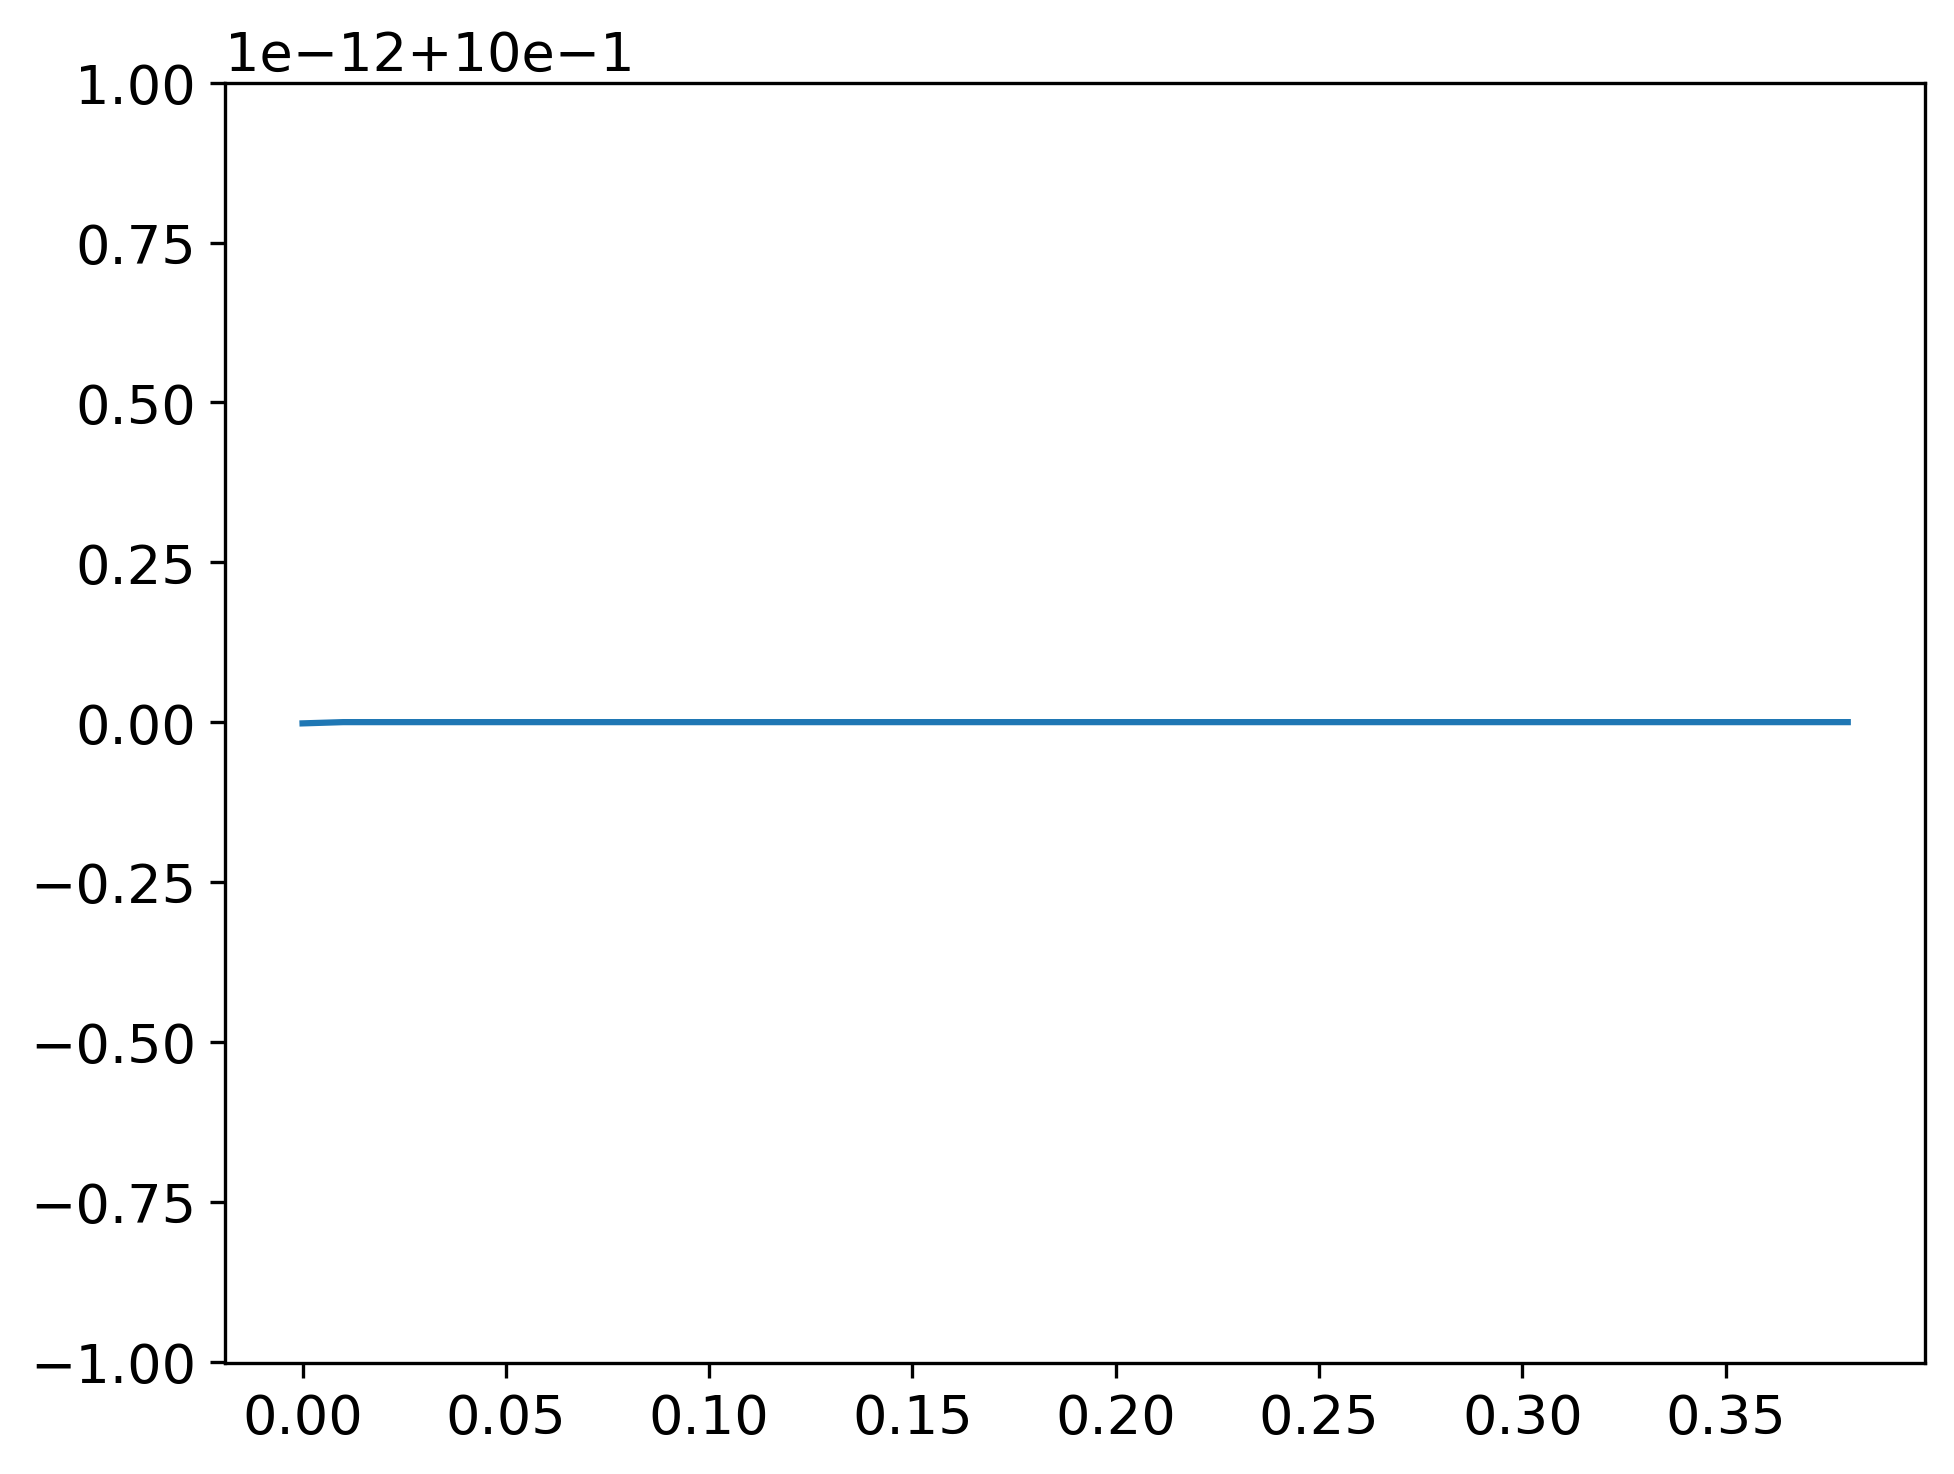

In [18]:
plt.plot(couplings[:-1], [np.abs(f) for f in fidelity])
# plt.ylim(1-1e-2,1+1e-3)
# plt.yscale('log')

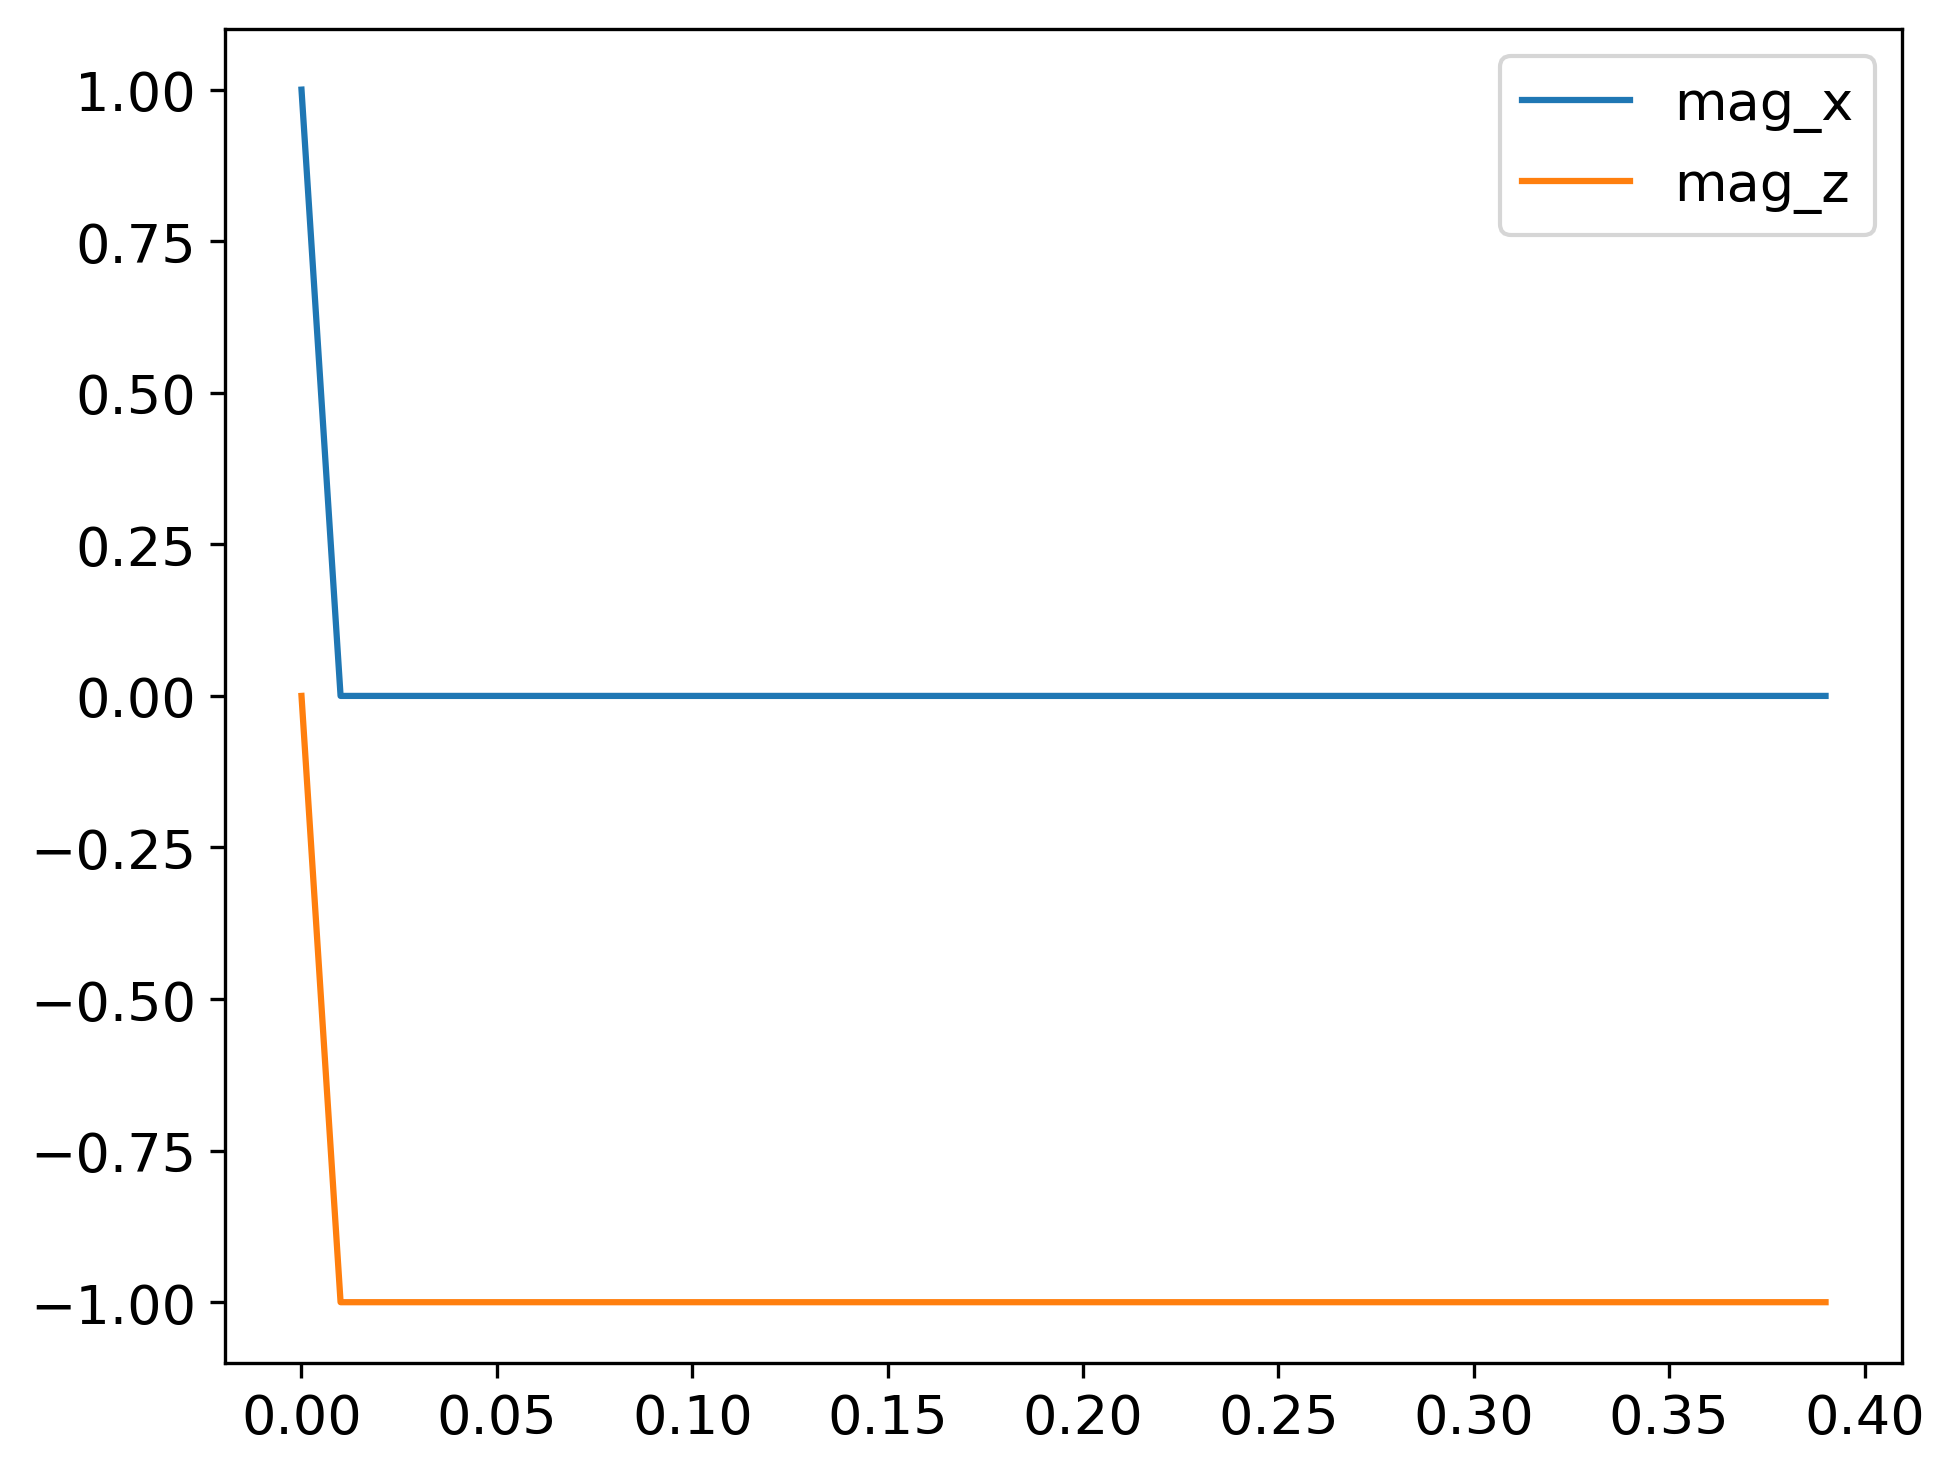

In [19]:
plt.plot(couplings, mag_x_tot, label='mag_x')
plt.plot(couplings, mag_z_tot, label='mag_z')
plt.legend()